In [34]:
from pptx import Presentation
from pptx.chart.data import CategoryChartData
from pptx.enum.chart import XL_CHART_TYPE
from pptx.util import Inches, Pt
import pandas as pd
from pptx.enum.chart import XL_LABEL_POSITION
from pptx.dml.color import RGBColor


In [58]:
data = {"DataType" : ['ABS', 'PRC'],
             "col1" : [49321,1.0],
             "col2" : [42321,0.9],
             "col3" : [38321,0.75],
             "col4" : [19321,0.48],
             "col5" : [321,0.009]}

df = pd.DataFrame(data)

col_lst = list(df)
col_lst.remove('DataType')
data_lsts = df[col_lst].values.tolist()


prs_path = r'C:\Users\eilon.eilstein\Desktop\Python\test.pptx'
prs = Presentation(prs_path)
slide = prs.slides[1]

# define chart data ---------------------
chart_data = CategoryChartData()
chart_data.categories = col_lst
chart_data.add_series('ABS', data_lsts[0])

# add chart to slide --------------------
x, y, cx, cy = Inches(1), Inches(1.5), Inches(10), Inches(6)
frame = slide.shapes.add_chart(
    XL_CHART_TYPE.COLUMN_CLUSTERED, x, y, cx, cy, chart_data
)



chart.category_axis.tick_labels.font.size= Pt(20) #שליטה על ציר האיקס
chart.value_axis.tick_labels.font.size= Pt(20) #שליטה על ציר הוואיי
chart.value_axis.tick_labels.number_format = '#,##0' #פורמט

data_label = plot.chart.plots[0].series[0].points[0].data_label
data_label.NumberFormat = '#,##0'

chart = frame.chart
plot = chart.plots[0]
plot.has_data_labels = True

prs.save(prs_path)



In [4]:
list_x = ['a', 'b','c']
list_y = ['d', 'e','f']

list_x[0:0] = list_y

In [5]:
list_x

['d', 'e', 'f', 'a', 'b', 'c']

In [11]:
list_of_words = ['banana', 'apple', 'grape', 'baanan', 'rapeg']
for word in list_of_words:
    ltr_list = list(word)
    sorted_list = sorted(ltr_list)
    sorted_word = ''.join(sorted_list)
    print(sorted_word)


aaabnn
aelpp
aegpr
aaabnn
aegpr


In [18]:

list_of_words = ['banana', 'apple', 'grape', 'baanan', 'rapeg']
list_anagrams = ['aaabnn', 'aelpp', 'aegpr']
used_anagrams = []
final_list = []
for anagram in list_anagrams:
    for word in list_of_words:
        ltr_list = list(word)
        sorted_list = sorted(ltr_list)
        sorted_word = ''.join(sorted_list)
        if (sorted_word == anagram) and (anagram not in used_anagrams):
            final_list.append([word])
            used_anagrams.append(anagram)
            
print(final_list)                
          


[['banana'], ['apple'], ['grape']]


In [2]:
import time
import keyboard as kb


In [4]:
i = 1
second_counter = 0
minute_counter = 0
hour_counter = 0

while i:
    
    time.sleep(1)
    second_counter += 1
    if second_counter == 60:
        second_counter = 0
        minute_counter += 1
    if minute_counter == 60:
        minute_counter = 0
        hour_counter += 1
    if kb.is_pressed('a'):
        break
    print(str(hour_counter)+':'+str(minute_counter)+':'+str(second_counter))
 
print(str(hour_counter)+':'+str(minute_counter)+':'+str(second_counter))        
    

0:0:1
0:0:2
0:0:3
0:0:4
0:0:5
0:0:6
0:0:7
0:0:8
0:0:9
0:0:10


KeyboardInterrupt: 

In [1]:
import datetime as dt

In [19]:
td = dt.datetime.now().date() - dt.timedelta(days=1)


td

datetime.date(2021, 10, 24)

In [36]:
path = r"C:\Users\eilon.eilstein\Downloads\users_revenue.xlsx"

In [142]:
import pandas as pd
import numpy as np 
df = pd.read_excel(path)




def add_cum_sum(df, calc):
    """
    Adds cumulative calculated column per user, over revenue date
    
    :param df: The dataframe to which the function adds the RT column
    :type df: pandas.DataFrame
    :param calc: The desired calculation to be executed cumulatively, where options are 'sum', 'mean/avg', 'min', 'max'
    :type calc: string
    
    :return: The initial Dataframe with the additional calculated col
    :rtype: pandas.DataFrame
    """
    
    # fix input
    if calc == 'avg':
        calc = 'mean'
    
    # creating the calculated field name
    new_col_name = 'Running ' + calc
    df.sort_values(['user_id', 'date'], inplace=True)
    
    # slice the data into sub-dataframe per each user, and loop cumulatively while performing the passed calculation
    df_lst = []
    for user in df['user_id'].unique():
        user_data = df[df['user_id'] == user].reset_index()
        user_data[new_col_name] = np.array([user_data[:i+1].agg(calc).revenues for i, row in user_data.iterrows()])
        df_lst.append(user_data)
    df = pd.concat(df_lst)

    return df
df_RT = add_cum_sum(df, 'avg')
df_RT


,index,user_id,date,revenues,Running mean
0,14,גיל,2021-05-04,3,3.000000
1,15,גיל,2021-05-05,26,14.500000
2,16,גיל,2021-05-06,24,17.666667
3,17,גיל,2021-05-07,25,19.500000
4,18,גיל,2021-05-08,9,17.400000
5,19,גיל,2021-05-09,3,15.000000
6,20,גיל,2021-05-10,26,16.571429
7,21,גיל,2021-05-11,5,15.125000
0,0,משה,2021-05-03,5,5.000000
1,1,משה,2021-05-04,4,4.500000


In [71]:
df = pd.read_excel(path)
df.sort_values('date', inplace=True)
df_grouped = df.groupby(['user_id'])


df.groupby('user_id').revenues.rolling(3, center=True).agg('sum').droplevel(1).revenues.to_frame().columns

AttributeError: 'Series' object has no attribute 'revenues'

In [101]:
df = pd.read_excel(path)
df.sort_values(['user_id', 'date'], inplace=True)
df_grouped = df.groupby(['user_id'])

# df['new'] = df_grouped['revenues'].rolling(3).mean()
df['new'] = df_grouped['revenues'].transform(lambda s: s.rolling(3, center=True).agg('mean'))
df

,user_id,date,revenues,new
9,גיל,2021-05-04,3,NaN
10,גיל,2021-05-05,26,17.666667
11,גיל,2021-05-06,24,NaN
0,משה,2021-05-03,5,NaN
1,משה,2021-05-04,4,8.000000
2,משה,2021-05-05,15,11.666667
3,משה,2021-05-06,16,13.333333
4,משה,2021-05-07,9,NaN
5,צילה,2021-05-04,7,NaN
6,צילה,2021-05-05,4,7.333333


In [24]:
from datetime import datetime
import keyboard as kb
import time

qst_num = int(input('How many questions are there?: '))

qst_list = list(range(1,qst_num+1))
print(qst_list)
qst = 1
last_time = datetime.now()
start_time = last_time
skipped = []
done_qst = []

print('Started at', datetime.now().strftime("%H:%M:%S"))

def next_qst(done, skp, all_qst, qst):
#     for q in all_qst:
#         if (q not in done) and (q not in skp):
#             return q
#             break
#         elif (len(done) + len(skp) == len(all_qst)):
#             if (qst < all_qst[-1]):
#                 return qst + 1
#                 break
#             else:
#                 qst = skp[0]
#         final_q = qst + 1
        
    available_q = []
    next_skp = []
    passed_skp = []
    for s in skp:
        if s > qst:
            next_skp.append(s)
        else:
            passed_skp.append(s)
    for q in all_qst:
        if (q not in done) and (q not in skp):
            available_q.append(q)
    if len(available_q) == 0 and (len(skp) > 0):
        if qst < skp[-1]:
            return next_skp[0]
        else:
            return passed_skp[0]
    elif len(available_q) == 0:
        return all_qst[-1] + 1
    
    else:
        return available_q[0]
        
        
        
    return final_q

def get_diff(lasttime):
    now = datetime.now()
    diff_seconds = int((now-lasttime).total_seconds())
    minutes = str(diff_seconds // 60)
    seconds = str(diff_seconds % 60)
    diff = minutes.zfill(2) + ':' + seconds.zfill(2)
    return [diff, diff_seconds]


def stop(lasttime, qst_p, st):
    now = datetime.now()
    diff = get_diff(lasttime)
    total_diff = get_diff(st)
    print('Question:',qst_p, '\tTime:', diff, '\tTotal Time:', total_diff)
    return now

while qst_num >= qst or len(skipped) > 0:
    
    if kb.is_pressed('space'):
        time.sleep(0.1)
        if qst in skipped:
            print('---Returned To question', qst, '---')
        last_time = stop(last_time, qst, start_time)
        if qst in skipped:
            print('----------')
            skipped.remove(qst)
        done_qst.append(qst)
        qst = next_qst(done_qst, skipped, qst_list, qst)
#         else:
#             qst += 1
        
    if kb.is_pressed('s'):
        time.sleep(0.1)
        print('---Skip---')
        last_time = stop(last_time, qst, start_time)
        print('----------')
        if qst not in skipped:
            skipped.append(qst)
#         if done_qst[-1] + 1 in skipped:
        qst = next_qst(done_qst, skipped, qst_list, qst)
        
    if kb.is_pressed('b'):
        time.sleep(0.1)
        print('Skipped Questions:', skipped)
        back_to_qst = int(input('To which question do you want to go back?:  '))
        last_time = datetime.now()
        qst = back_to_qst
    if kb.is_pressed('backspace'):
        print('Break')
        break
    if len(done_qst) == len(qst_list):
        print('You are Done!')
        break
print('Stopped at', datetime.now().strftime("%H:%M:%S"))

How many questions are there?: 6
[1, 2, 3, 4, 5, 6]
Started at 19:55:57
Question: 1 	Time: 00:01 	Total Time: 00:01
---Skip---
Question: 2 	Time: 00:01 	Total Time: 00:02
----------
Question: 3 	Time: 00:01 	Total Time: 00:04
Question: 4 	Time: 00:01 	Total Time: 00:05
Skipped Questions: [2]
To which question do you want to go back?:  2
---Returned To question 2 ---
Question: 2 	Time: 00:02 	Total Time: 00:12
----------
Question: 5 	Time: 00:02 	Total Time: 00:14
---Skip---
Question: 6 	Time: 00:04 	Total Time: 00:19
----------
Skipped Questions: [6]
To which question do you want to go back?:  1
Question: 1 	Time: 00:01 	Total Time: 00:34
You are Done!
Stopped at 19:56:32


In [7]:
from datetime import datetime
import keyboard as kb
import time

qst_num = int(input('How many questions are there?: '))
qst_list = list(range(1,qst_num+1))

qst_dict = {}
for q in qst_list:
    qst_dict[q] = 0

qst = 1
last_time = datetime.now()
start_time = last_time
skipped = []
done_qst = []


def next_qst(done, skp, all_qst, qst):
    available_q = []
    next_skp = []
    passed_skp = []
    for s in skp:
        if s > qst:
            next_skp.append(s)
        else:
            passed_skp.append(s)
    for q in all_qst:
        if (q not in done) and (q not in skp):
            available_q.append(q)
    if len(available_q) == 0 and (len(skp) > 0):
        if qst < skp[-1]:
            return next_skp[0]
        else:
            return passed_skp[0]
    elif len(available_q) == 0:
        return all_qst[-1] + 1
    
    else:
        return available_q[0]
        
        
        


def get_diff(lasttime):
    now = datetime.now()
    diff_seconds = int((now-lasttime).total_seconds())
    minutes = str(diff_seconds // 60)
    seconds = str(diff_seconds % 60)
    diff = minutes.zfill(2) + ':' + seconds.zfill(2)
    return [diff, diff_seconds]


def stop(lasttime, qst_p, st):
    now = datetime.now()
    diff_func = get_diff(lasttime)
    diff = diff_func[0]
    diff_sec = diff_func[1]
    total_diff = get_diff(st)[0]
    print('Question:',qst_p, '\tTime:', diff, '\tTotal Time:', total_diff)
    return [now, diff_sec]

print('Working on Question number 1')

while len(done_qst) < qst_num:
    
    if kb.is_pressed('space'):
        time.sleep(0.2)
        if qst in skipped:
            print('---Returned To question', qst, '---')
        stop_output = stop(last_time, qst, start_time)
        last_time = stop_output[0]
        qst_dict[qst] +=  stop_output[1]
        if qst in skipped:
            print('----------')
            skipped.remove(qst)
        done_qst.append(qst)
        qst = next_qst(done_qst, skipped, qst_list, qst)
        print('Working on Question number',qst)

#         else:
#             qst += 1
        
    if kb.is_pressed('s'):
        time.sleep(0.2)
        print('---Skip---')
        stop_output = stop(last_time, qst, start_time)
        last_time = stop_output[0]
        qst_dict[qst] +=  stop_output[1]
        print('----------')
        if qst not in skipped:
            skipped.append(qst)
#         if done_qst[-1] + 1 in skipped:
        qst = next_qst(done_qst, skipped, qst_list, qst)
        print('Working on Question number',qst)
        
    if kb.is_pressed('b'):
        time.sleep(0.2)
        print('Skipped Questions:', skipped)
        back_to_qst = int(input('To which question do you want to go back?:  '))
        last_time = datetime.now()
        qst = back_to_qst
        print('Working on Question number',qst)
    if kb.is_pressed('backspace'):
        print('Break')
        break
    if len(done_qst) == len(qst_list):
        print('You are Done!')
        break
total_time = get_diff(start_time)[0]
print('Stopped at', datetime.now().strftime("%H:%M:%S"),'\nTotal Time:', total_time)

print()
print('Final Stats:\n-------------------')
for q in qst_list:
    print('Question #', q, '\tTotal Time:', str(qst_dict[q] // 60).zfill(2)+':'+str(qst_dict[q] % 60).zfill(2))
    
    

How many questions are there?: 3
Working on Question number 1
---Skip---
Question: 1 	Time: 00:03 	Total Time: 00:03
----------
Working on Question number 2
---Skip---
Question: 2 	Time: 00:13 	Total Time: 00:16
----------
Working on Question number 3
Skipped Questions: [1, 2]
To which question do you want to go back?:  1
Working on Question number 1
---Returned To question 1 ---
Question: 1 	Time: 00:03 	Total Time: 00:23
----------
Working on Question number 3
Question: 3 	Time: 00:02 	Total Time: 00:25
Working on Question number 2
---Returned To question 2 ---
Question: 2 	Time: 00:05 	Total Time: 00:31
----------
Working on Question number 4
You are Done!
Stopped at 15:41:35 
Total Time: 00:31

Final Stats:
-------------------
Question # 1 	Total Time: 00:06
Question # 2 	Total Time: 00:18
Question # 3 	Total Time: 00:02


In [15]:
def combine_coins(sym, rng):
    return ', '.join([sym+str(x) for x in rng])

print(combine_coins('$', range(5)))


$0, $1, $2, $3, $4


In [2]:
print({x:x**2 for x in range(10) if x % 2 == 0 } )

{0: 0, 2: 4, 4: 16, 6: 36, 8: 64}


## Math Function sketcher

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

<IPython.core.display.Javascript object>


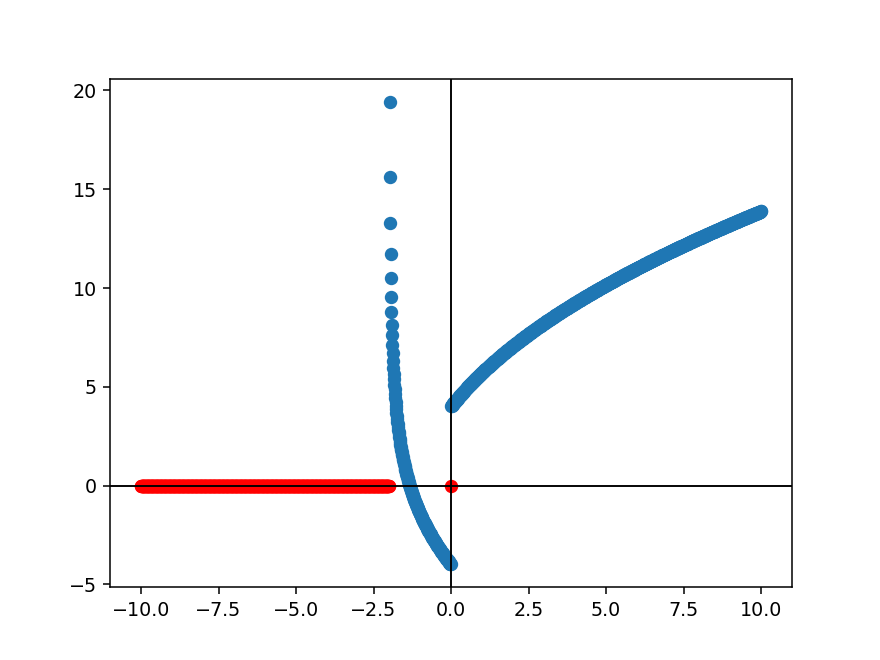

In [16]:
%matplotlib notebook

def calc_func(l_rng=-5, h_rng=5, y_rng=100):
#     func_dict = {}
    x_vals = []
    y_vals = []
    is_defined = []
    divider = 100
    for x in range(l_rng*divider, (divider*h_rng)+1):    
        x = x/divider
        
        try:
            # ------------------------------------
            # Insert Expression Here:
            rad_to_degree = (x/360)*(2*math.pi)
            func_x = (6*x**2 + 8*x) / (math.sqrt(2*x**3 + 4*x**2))
            # ------------------------------------
            
            x_vals.append(x)
            y_vals.append(func_x)
            if abs(func_x) > int(y_rng):
                is_defined.append(999)
            else:
                is_defined.append(1)
            
        except:
            x_vals.append(x)
            y_vals.append(0)
            is_defined.append(0)
    return pd.DataFrame({'X':x_vals, 'Y':y_vals, 'isDefined':is_defined})

edges = 10
highest_y = 20
df = calc_func(-edges, edges, highest_y)
df_def = df[df['isDefined'] == 1]
plt.plot(df_def['X'], df_def['Y'], marker='o', lw=0)

df_undef = df[df['isDefined'] == 0]
plt.plot(df_undef['X'], df_undef['Y'], marker='o', color='r', lw=0)


axes_limit = 2

if max(df_def['X'])+axes_limit >= 0 and min(df_def['X'])-axes_limit <= 0:
    plt.axvline(linewidth=1, color='k')
if max(df_def['Y'])+axes_limit >= 0 and min(df_def['Y'])-axes_limit <= 0:    
    plt.axhline(linewidth=1, color='k')
plt.show()



In [185]:
df.loc[0:2000]

,X,Y,isDefined
0,-720.0,506.981772,0
1,-719.9,506.911059,0
2,-719.8,506.840347,0
3,-719.7,506.769634,0
4,-719.6,506.698921,0
...,...,...,...
1996,-520.4,365.837947,0
1997,-520.3,365.767233,0
1998,-520.2,365.696518,0
1999,-520.1,365.625804,0


In [2]:
# import pandas as pd
import os

In [10]:
path_dir = r"C:\Users\eilon.eilstein\Desktop\Eilon\GitHub\My-Projects\Misc"
fname = 'תיעוד הוצאות - העתק.xlsx'
path_file = os.path.join(path_dir, fname)
path_file
path_file.count('o')
'12121242e'.count('')

10

In [11]:
import itertools
import string 
from win32com.client import Dispatch

file = path_file

# chars = string.ascii_uppercase + string.ascii_lowercase + string.digits + ''.join(['!', '@', '#', '$', '%'])
# chars = ['12', '42', 'E', 'e', '299792458']
chars = string.digits
for password_length in range(3, 13):
    for password in itertools.product(chars, repeat=password_length):
        password = ''.join(password)
        
        if password.count('E') > 1 or password.count('e') > 1 or password.count('299792458') > 1 or password.count('42') > 1:
            break

#         print ('Testing password: '+ password)
        instance = Dispatch ('Excel.Application')

        try:
            instance.Workbooks.Open(file, False, True, None, password)
            print ('Password Cracked: ' + password)
            break

        except:
            print ('Password Failed: '+ password)
            pass
print('*** End ***')

Password Failed: 000
Password Failed: 001
Password Failed: 002
Password Failed: 003
Password Failed: 004
Password Failed: 005
Password Failed: 006
Password Failed: 007
Password Failed: 008
Password Failed: 009
Password Failed: 010
Password Failed: 011
Password Failed: 012
Password Failed: 013
Password Failed: 014
Password Failed: 015
Password Failed: 016
Password Failed: 017
Password Failed: 018
Password Failed: 019
Password Failed: 020
Password Failed: 021
Password Failed: 022
Password Failed: 023
Password Failed: 024
Password Failed: 025
Password Failed: 026
Password Failed: 027
Password Failed: 028
Password Failed: 029
Password Failed: 030
Password Failed: 031
Password Failed: 032
Password Failed: 033
Password Failed: 034
Password Failed: 035
Password Failed: 036
Password Failed: 037
Password Failed: 038
Password Failed: 039
Password Failed: 040
Password Failed: 041
Password Failed: 042
Password Failed: 043
Password Failed: 044
Password Failed: 045
Password Failed: 046
Password Fail

Password Failed: 391
Password Failed: 392
Password Failed: 393
Password Failed: 394
Password Failed: 395
Password Failed: 396
Password Failed: 397
Password Failed: 398
Password Failed: 399
Password Failed: 400
Password Failed: 401
Password Failed: 402
Password Failed: 403
Password Failed: 404
Password Failed: 405
Password Failed: 406
Password Failed: 407
Password Failed: 408
Password Failed: 409
Password Failed: 410
Password Failed: 411
Password Failed: 412
Password Failed: 413
Password Failed: 414
Password Failed: 415
Password Failed: 416
Password Failed: 417
Password Failed: 418
Password Failed: 419
Password Failed: 420
Password Failed: 421
Password Failed: 422
Password Failed: 423
Password Failed: 424
Password Failed: 425
Password Failed: 426
Password Failed: 427
Password Failed: 428
Password Failed: 429
Password Failed: 430
Password Failed: 431
Password Failed: 432
Password Failed: 433
Password Failed: 434
Password Failed: 435
Password Failed: 436
Password Failed: 437
Password Fail

Password Failed: 782
Password Failed: 783
Password Failed: 784
Password Failed: 785
Password Failed: 786
Password Failed: 787
Password Failed: 788
Password Failed: 789
Password Failed: 790
Password Failed: 791
Password Failed: 792
Password Failed: 793
Password Failed: 794
Password Failed: 795
Password Failed: 796
Password Failed: 797
Password Failed: 798
Password Failed: 799
Password Failed: 800
Password Failed: 801
Password Failed: 802
Password Failed: 803
Password Failed: 804
Password Failed: 805
Password Failed: 806
Password Failed: 807
Password Failed: 808
Password Failed: 809
Password Failed: 810
Password Failed: 811
Password Failed: 812
Password Failed: 813
Password Failed: 814
Password Failed: 815
Password Failed: 816
Password Failed: 817
Password Failed: 818
Password Failed: 819
Password Failed: 820
Password Failed: 821
Password Failed: 822
Password Failed: 823
Password Failed: 824
Password Failed: 825
Password Failed: 826
Password Failed: 827
Password Failed: 828
Password Fail

Password Failed: 0165
Password Failed: 0166
Password Failed: 0167
Password Failed: 0168
Password Failed: 0169
Password Failed: 0170
Password Failed: 0171
Password Failed: 0172
Password Failed: 0173
Password Failed: 0174
Password Failed: 0175
Password Failed: 0176
Password Failed: 0177
Password Failed: 0178
Password Failed: 0179
Password Failed: 0180
Password Failed: 0181
Password Failed: 0182
Password Failed: 0183
Password Failed: 0184
Password Failed: 0185
Password Failed: 0186
Password Failed: 0187
Password Failed: 0188
Password Failed: 0189
Password Failed: 0190
Password Failed: 0191
Password Failed: 0192
Password Failed: 0193
Password Failed: 0194
Password Failed: 0195
Password Failed: 0196
Password Failed: 0197
Password Failed: 0198
Password Failed: 0199
Password Failed: 0200
Password Failed: 0201
Password Failed: 0202
Password Failed: 0203
Password Failed: 0204
Password Failed: 0205
Password Failed: 0206
Password Failed: 0207
Password Failed: 0208
Password Failed: 0209
Password F

Password Failed: 0538
Password Failed: 0539
Password Failed: 0540
Password Failed: 0541
Password Failed: 0542
Password Failed: 0543
Password Failed: 0544
Password Failed: 0545
Password Failed: 0546
Password Failed: 0547
Password Failed: 0548
Password Failed: 0549
Password Failed: 0550
Password Failed: 0551
Password Failed: 0552
Password Failed: 0553
Password Failed: 0554
Password Failed: 0555
Password Failed: 0556
Password Failed: 0557
Password Failed: 0558
Password Failed: 0559
Password Failed: 0560
Password Failed: 0561
Password Failed: 0562
Password Failed: 0563
Password Failed: 0564
Password Failed: 0565
Password Failed: 0566
Password Failed: 0567
Password Failed: 0568
Password Failed: 0569
Password Failed: 0570
Password Failed: 0571
Password Failed: 0572
Password Failed: 0573
Password Failed: 0574
Password Failed: 0575
Password Failed: 0576
Password Failed: 0577
Password Failed: 0578
Password Failed: 0579
Password Failed: 0580
Password Failed: 0581
Password Failed: 0582
Password F

Password Failed: 0911
Password Failed: 0912
Password Failed: 0913
Password Failed: 0914
Password Failed: 0915
Password Failed: 0916
Password Failed: 0917
Password Failed: 0918
Password Failed: 0919
Password Failed: 0920
Password Failed: 0921
Password Failed: 0922
Password Failed: 0923
Password Failed: 0924
Password Failed: 0925
Password Failed: 0926
Password Failed: 0927
Password Failed: 0928
Password Failed: 0929
Password Failed: 0930
Password Failed: 0931
Password Failed: 0932
Password Failed: 0933
Password Failed: 0934
Password Failed: 0935
Password Failed: 0936
Password Failed: 0937
Password Failed: 0938
Password Failed: 0939
Password Failed: 0940
Password Failed: 0941
Password Failed: 0942
Password Failed: 0943
Password Failed: 0944
Password Failed: 0945
Password Failed: 0946
Password Failed: 0947
Password Failed: 0948
Password Failed: 0949
Password Failed: 0950
Password Failed: 0951
Password Failed: 0952
Password Failed: 0953
Password Failed: 0954
Password Failed: 0955
Password F

In [7]:
df_novolog = pd.read_excel(path_file)
df_novolog = df_novolog.iloc[:, [0,1,3,4,2,5,6]]
cols = list(df_novolog.columns)
df_novolog.head()

,Category,StationName,person_CityName,Dose_ind,Age_Group,Id_Type_Desc,Cnt
0,Station,דייר אל אסד מתנבס - חיסונים,דייר אל-אסד,1,12-15,"ת""ז",3
1,Station,דייר אל אסד מתנבס - חיסונים,דייר אל-אסד,2,12-15,"ת""ז",1
2,Station,דייר אל אסד מתנבס - חיסונים,בענה,1,12-15,"ת""ז",42
3,Station,דייר אל אסד מתנבס - חיסונים,ג'דיידה-מכר,1,12-15,"ת""ז",9
4,Station,דייר אל אסד מתנבס - חיסונים,ג'דיידה-מכר,1,16-19,"ת""ז",1


In [47]:
cols[:-1]

['Category',
 'StationName',
 'person_CityName',
 'Dose_ind',
 'Age_Group',
 'Id_Type_Desc']

In [48]:
df_gb = df_novolog.groupby(cols[:-1]).sum()
df_gb.head(10)

Cnt
Category StationName person_CityName Dose_ind Age_Group Id_Type_Desc     
Executer אופרת       אילת            3        30-39     ת"ז             1
                     אלון שבות       3        16-19     ת"ז             1
                                              20-29     ת"ז             1
                     אלעד            3        16-19     ת"ז             1
                     אפרת            1        12-15     ת"ז             1
                                              60-69     ת"ז             1
                                     2        30-39     ת"ז             2
                                     3        16-19     ת"ז             4
                                              20-29     ת"ז             4
                                              30-39     ת"ז             3

In [70]:
piv = df_gb.pivot_table(index=cols[:4], columns=[cols[5], cols[4]], values=cols[-1]).fillna(0).reset_index()
piv.to_excel(os.path.join(path_dir, 'novolog_piv.xlsx'), index=True)

In [71]:
piv

Id_Type_Desc  Category                   StationName person_CityName Dose_ind  \
Age_Group                                                                       
0             Executer                        אופרת             אילת        3   
1             Executer                        אופרת        אלון שבות        3   
2             Executer                        אופרת             אלעד        3   
3             Executer                        אופרת             אפרת        1   
4             Executer                        אופרת             אפרת        2   
...                ...                           ...             ...      ...   
1225           Station  רכסים - בית הקשיש  - חיסונים      קרית טבעון        3   
1226           Station  רכסים - בית הקשיש  - חיסונים          רחובות        1   
1227           Station  רכסים - בית הקשיש  - חיסונים           רכסים        1   
1228           Station  רכסים - בית הקשיש  - חיסונים           רכסים        2   
1229           Station  רכסים - בית הקשיש  - חיסונים           רכסים        3   

Id_Type_Desc דרכון                                ...   ת"ז                    \
Age_Group    12-15 16-19 20-29 30-39 40-49 50-59  ... 12-15 16-19 20-29 30-39   
0              0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   1.0   
1              0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   1.0   1.0   0.0   
2              0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   1.0   0.0   0.0   
3              0.0   0.0   0.0   0.0   0.0   0.0  ...   1.0   0.0   0.0   0.0   
4              0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   2.0   
...            ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   
1225           0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   3.0   0.0   
1226           0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   
1227           0.0   0.0   0.0   0.0   0.0   0.0  ...   5.0   7.0  13.0   4.0   
1228           0.0   0.0   0.0   0.0   0.0   0.0  ...   4.0   0.0   0.0   1.0   
1229           0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   5.0  20.0  14.0   

Id_Type_Desc                                     
Age_Group    40-49 50-59 60-69 70-79 80-89  90+  
0              0.0   0.0   0.0   0.0   0.0  0.0  
1              0.0   0.0   0.0   0.0   0.0  0.0  
2              0.0   0.0   0.0   0.0   0.0  0.0  
3              0.0   0.0   1.0   0.0   0.0  0.0  
4              0.0   0.0   0.0   0.0   0.0  0.0  
...            ...   ...   ...   ...   ...  ...  
1225           0.0   0.0   0.0   0.0   0.0  0.0  
1226           1.0   0.0   0.0   0.0   0.0  0.0  
1227           7.0   1.0   0.0   0.0   0.0  1.0  
1228           0.0   2.0   0.0   0.0   0.0  0.0  
1229           7.0   2.0   1.0   0.0   1.0  0.0  

[1230 rows x 26 columns]